In [1]:
# Vector Quantization Demo
# Author: Animesh Gupta

# Use racoon face image
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.misc.face.html


import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

try:
    from sklearn import cluster
except ModuleNotFoundError:
    %pip install -qq scikit-learn
    from sklearn import cluster
try:
    import probml_utils as pml
except ModuleNotFoundError:
    %pip install -qq git+https://github.com/probml/probml-utils.git
    import probml_utils as pml

try:  # SciPy >= 0.16 have face in misc
    from scipy.misc import face

    face = face(gray=True)
except ImportError:
    face = sp.face(gray=True)



  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 272 kB 5.1 MB/s 
     |████████████████████████████████| 125 kB 62.0 MB/s 
     |████████████████████████████████| 88 kB 6.5 MB/s 
     |████████████████████████████████| 72 kB 546 kB/s 
     |████████████████████████████████| 1.1 MB 52.8 MB/s 


In [ ]:
pml.latexify(width_scale_factor=1, fig_height=2)  

/usr/local/lib/python3.7/dist-packages/probml_utils/plotting.py:80: UserWarning: set FIG_DIR environment variable to save figures
  warnings.warn("set FIG_DIR environment variable to save figures")


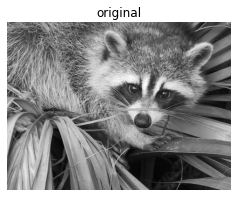

In [5]:
vmin = face.min()
vmax = face.max()

 # compressed face
plt.figure(figsize=(4, 4))
plt.imshow(face, cmap=plt.cm.gray, vmin=vmin, vmax=vmax)
plt.title('original')
plt.axis('off')
pml.savefig(f"vectorQuantizationOriginal.pdf", dpi=300)
plt.show()

/usr/local/lib/python3.7/dist-packages/probml_utils/plotting.py:80: UserWarning: set FIG_DIR environment variable to save figures
  warnings.warn("set FIG_DIR environment variable to save figures")


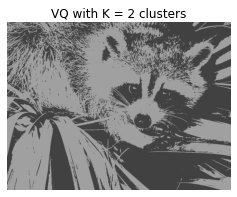

/usr/local/lib/python3.7/dist-packages/probml_utils/plotting.py:80: UserWarning: set FIG_DIR environment variable to save figures
  warnings.warn("set FIG_DIR environment variable to save figures")


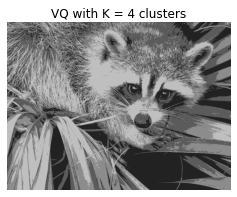

In [6]:
n_clusters = [2, 4]
np.random.seed(0)

X = face.reshape((-1, 1))  # We need an (n_sample, n_feature) array
for n_cluster in n_clusters:
    k_means = cluster.KMeans(n_clusters=n_cluster, n_init=4)
    k_means.fit(X)
    values = k_means.cluster_centers_.squeeze()
    labels = k_means.labels_

    # create an array from labels and values
    face_compressed = np.choose(labels, values)
    face_compressed.shape = face.shape


    # compressed face
    plt.figure(figsize=(4, 4))
    plt.title(f"VQ with K = {n_cluster} clusters")
    plt.imshow(face_compressed, cmap=plt.cm.gray, vmin=vmin, vmax=vmax)
    plt.axis('off')
    pml.savefig(f"vectorQuantization_{n_cluster}.pdf", dpi=300)
    plt.show()